In [ ]:
#Data Analysis on Wine Quality Dataset- 20/06/2024

In [1]:
import pandas as pd

wine_data = pd.read_csv('winequalityN.csv')

print(wine_data.head())
print(wine_data.info())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [10]:
from sklearn.impute import SimpleImputer

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

print(X.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

X.drop(categorical_cols, axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  type_white  
0      8.8         1.0  
1      9.5         1.0  
2     10.1 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.166898         -0.423168     0.284273        3.207005  -0.315139   
1      -0.707155         -0.240846     0.146551       -0.807946  -0.200946   
2       0.682078         -0.362394     0.559716        0.306151  -0.172397   
3      -0.012539         -0.666264     0.008829        0.642482   0.055989   
4      -0.012539         -0.666264     0.008829        0.642482   0.055989   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.815565              0.959976  2.102214 -1.359590  -0.545868   
1            -0.931107              0.287618 -0.232332  0.508116  -0.276974   
2            -0.029599             -0.331660  0.134525  0.259089  -0.613091   
3             0.928254              1.243074  0.301278 -0.176709  -0.881985   
4             0.928254              1.243074  0.301278 -0.176709  -0.881985   

    alcohol  type_white  
0 -1.418558         1.0  
1 -0

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: X_train shape={X_train.shape}, y_train shape={y_train.shape}')
print(f'Test set: X_test shape={X_test.shape}, y_test shape={y_test.shape}')

Training set: X_train shape=(5197, 12), y_train shape=(5197,)
Test set: X_test shape=(1300, 12), y_test shape=(1300,)


In [17]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression:')
print(f'Mean Squared Error: {mse_lr}')
print(f'R^2 Score: {r2_lr}')

Linear Regression:
Mean Squared Error: 0.47119110923082663
R^2 Score: 0.3408065203047844


In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\nDecision Tree:')
print(f'Mean Squared Error: {mse_dt}')
print(f'R^2 Score: {r2_dt}')


Decision Tree:
Mean Squared Error: 0.6046153846153847
R^2 Score: 0.15414677515353747


In [19]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest:')
print(f'Mean Squared Error: {mse_rf}')
print(f'R^2 Score: {r2_rf}')


Random Forest:
Mean Squared Error: 0.3179442307692308
R^2 Score: 0.5551979659125621


In [20]:
#SVM
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print('\nSupport Vector Machine (SVM):')
print(f'Mean Squared Error: {mse_svm}')
print(f'R^2 Score: {r2_svm}')


Support Vector Machine (SVM):
Mean Squared Error: 0.41127984774335224
R^2 Score: 0.4246220086685756


In [21]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print('\nGradient Boosting:')
print(f'Mean Squared Error: {mse_gb}')
print(f'R^2 Score: {r2_gb}')


Gradient Boosting:
Mean Squared Error: 0.41430134183286527
R^2 Score: 0.42039495691881745


In [22]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print('\nK-Nearest Neighbors (KNN):')
print(f'Mean Squared Error: {mse_knn}')
print(f'R^2 Score: {r2_knn}')


K-Nearest Neighbors (KNN):
Mean Squared Error: 0.4674153846153845
R^2 Score: 0.346088735946941


In [ ]:
'''
Sice the MSE and R^2 for Random Forest has the lowest value
(Mean Squared Error: 0.3179442307692308, R^2 Score: 0.5551979659125621)
it is the best algorithm for regression on the Wine_Quality Dataset
'''

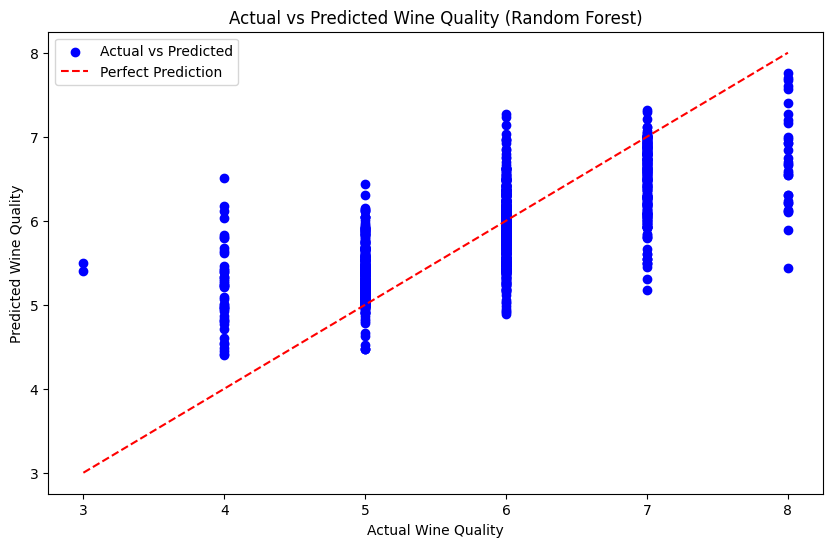

In [24]:
# Plotting actual vs predicted values using Random Forest Algorithm

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Actual vs Predicted Wine Quality (Random Forest)')
plt.legend()
plt.show()